## COVID worksheet

References:

* [Learning pandas by Exploring COVID-19 Data
Posted by Matt Makai on March 28, 2020](https://www.fullstackpython.com/blog/learn-pandas-basic-commands-explore-covid-19-data.html)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
URL = "https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide"
csv_data = "https://opendata.ecdc.europa.eu/covid19/casedistribution/csv"

In [3]:
df = pd.read_csv(csv_data, encoding="ISO-8859-1")

In [4]:
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,19/04/2020,19,4,2020,63,0,Afghanistan,AF,AFG,37172386.0
1,18/04/2020,18,4,2020,51,1,Afghanistan,AF,AFG,37172386.0
2,17/04/2020,17,4,2020,10,4,Afghanistan,AF,AFG,37172386.0
3,16/04/2020,16,4,2020,70,2,Afghanistan,AF,AFG,37172386.0
4,15/04/2020,15,4,2020,49,2,Afghanistan,AF,AFG,37172386.0


In [5]:
df[df.countriesAndTerritories=="Vietnam"]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
11589,19/04/2020,19,4,2020,0,0,Vietnam,VN,VNM,95540395.0
11590,18/04/2020,18,4,2020,1,0,Vietnam,VN,VNM,95540395.0
11591,17/04/2020,17,4,2020,0,0,Vietnam,VN,VNM,95540395.0
11592,16/04/2020,16,4,2020,1,0,Vietnam,VN,VNM,95540395.0
11593,15/04/2020,15,4,2020,9,0,Vietnam,VN,VNM,95540395.0
...,...,...,...,...,...,...,...,...,...,...
11691,04/01/2020,4,1,2020,0,0,Vietnam,VN,VNM,95540395.0
11692,03/01/2020,3,1,2020,0,0,Vietnam,VN,VNM,95540395.0
11693,02/01/2020,2,1,2020,0,0,Vietnam,VN,VNM,95540395.0
11694,01/01/2020,1,1,2020,0,0,Vietnam,VN,VNM,95540395.0


In [6]:
df.countriesAndTerritories.unique() #[-10:]

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia_and_Herzegovina',
       'Botswana', 'Brazil', 'British_Virgin_Islands',
       'Brunei_Darussalam', 'Bulgaria', 'Burkina_Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape_Verde',
       'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands',
       'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia', 'Cuba',
       'CuraÃ§ao', 'Cyprus', 'Czechia',
       'Democratic_Republic_of_the_Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican_Republic', 'Ecuador', 'Egypt',
       'El_Salvador', 'Equatorial_Guinea', 'Eritrea', 'Es

In [7]:
places = df[["countriesAndTerritories", "geoId", "countryterritoryCode", "popData2018"]]
places = places.drop_duplicates()
places.popData2018 = places.popData2018.astype('float').apply(lambda x: "{:,.0f}".format(x))
row = places.query("geoId == 'GE'")
row

,countriesAndTerritories,geoId,countryterritoryCode,popData2018
4081,Georgia,GE,GEO,"3,731,000"


In [8]:
places.set_index("geoId", inplace=True)

In [9]:
places

,countriesAndTerritories,countryterritoryCode,popData2018
geoId,,,
AF,Afghanistan,AFG,"37,172,386"
AL,Albania,ALB,"2,866,376"
DZ,Algeria,DZA,"42,228,429"
AD,Andorra,AND,"77,006"
AO,Angola,AGO,"30,809,762"
...,...,...,...
VE,Venezuela,VEN,"28,870,195"
VN,Vietnam,VNM,"95,540,395"
YE,Yemen,YEM,"28,498,687"


In [10]:
def country_data(c):
    data = df[df.countriesAndTerritories==c][['dateRep','year','month', 'day','cases','deaths']]
    data.sort_values(['year','month', 'day'], inplace=True)
    data["total_cases"] = data.cases.cumsum()
    data["total_deaths"] = data.deaths.cumsum()
    return data

country1 = "Germany"
country2 = "United_States_of_America"
country3 = "China"
table1 = country_data(country1)
table2 = country_data(country2)
table3 = country_data(country3)

In [11]:
table2

,dateRep,year,month,day,cases,deaths,total_cases,total_deaths
11455,31/12/2019,2019,12,31,0,0,0,0
11454,01/01/2020,2020,1,1,0,0,0,0
11453,02/01/2020,2020,1,2,0,0,0,0
11452,03/01/2020,2020,1,3,0,0,0,0
11451,04/01/2020,2020,1,4,0,0,0,0
...,...,...,...,...,...,...,...,...
11349,15/04/2020,2020,4,15,26922,2408,609516,26057
11348,16/04/2020,2020,4,16,30148,4928,639664,30985
11347,17/04/2020,2020,4,17,31667,2299,671331,33284
11346,18/04/2020,2020,4,18,30833,3770,702164,37054


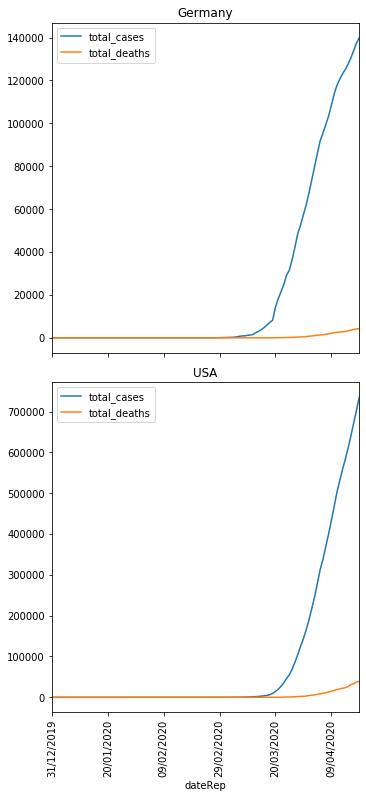

In [12]:
fig = plt.figure(figsize=(5, 11))
ax1 = plt.subplot('211')
table1.plot('dateRep',["total_cases","total_deaths"],ax=ax1, title="Germany")
ax2 = plt.subplot('212', sharex = ax1)
table2.plot('dateRep',["total_cases","total_deaths"],ax=ax2, title="USA")
plt.xticks(rotation=90)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show();

In [13]:
df[df.countriesAndTerritories=="China"].popData2018[0:1].astype('int')

2296    1392730000
Name: popData2018, dtype: int64

In [14]:
germany_pop = 83_783_942
usa_pop = 330_610_570
china_pop = 1_438_222_390 

In [15]:
def per_capita(table, pop):
    table['total_cases_per_capita']  = table.total_cases/germany_pop
    table['total_deaths_per_capita'] = table.total_deaths/germany_pop    
    return table

table1 = per_capita(table1, germany_pop)
table2 = per_capita(table2, usa_pop)
table3 = per_capita(table3, china_pop)

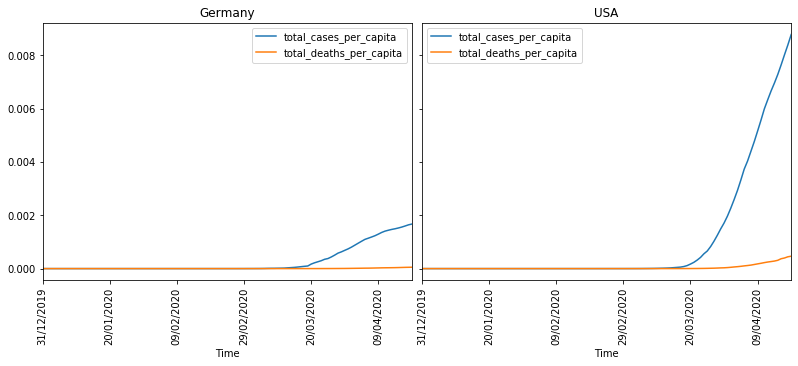

In [16]:
fig = plt.figure(figsize=(11, 5))
ax1 = plt.subplot('121')
table1.plot('dateRep',["total_cases_per_capita", "total_deaths_per_capita"], 
            ax=ax1, title="Germany")
plt.xticks(rotation=90)
plt.xlabel("Time")
ax2 = plt.subplot('122', sharey = ax1)
table2.plot('dateRep',["total_cases_per_capita", "total_deaths_per_capita"],
            ax=ax2, title="USA")
plt.xticks(rotation=90)
plt.xlabel("Time")

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show();

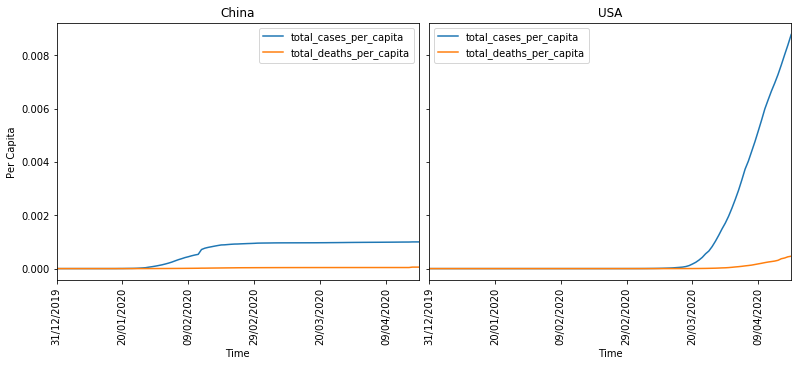

In [17]:
fig = plt.figure(figsize=(11, 5))
ax1 = plt.subplot('121')
table3.plot('dateRep',["total_cases_per_capita", "total_deaths_per_capita"], 
            ax=ax1, title="China")
plt.xticks(rotation=90)
plt.xlabel("Time")
plt.ylabel("Per Capita")

ax2 = plt.subplot('122', sharey = ax1)
table2.plot('dateRep',["total_cases_per_capita", "total_deaths_per_capita"],
            ax=ax2, title="USA")
plt.xticks(rotation=90)
plt.xlabel("Time")

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show();

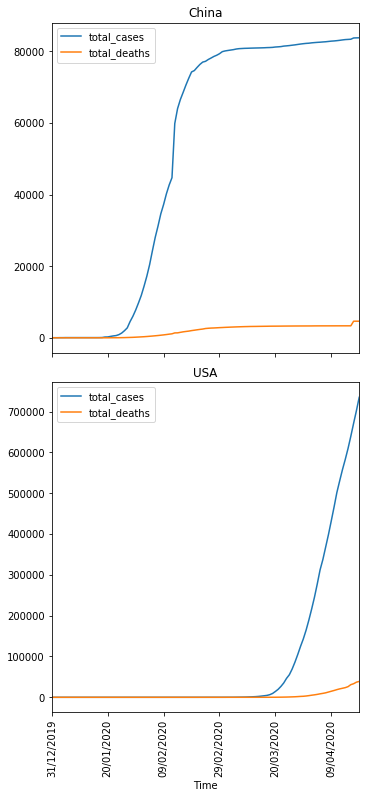

In [18]:
fig = plt.figure(figsize=(5, 11))
ax1 = plt.subplot('211')
table3.plot('dateRep',["total_cases","total_deaths"],ax=ax1, title="China")
ax2 = plt.subplot('212', sharex = ax1)
table2.plot('dateRep',["total_cases","total_deaths"],ax=ax2, title="USA")
plt.xticks(rotation=90)
plt.xlabel("Time")
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show();